(sec-qpe)=
# Quantum Phase Estimation

The problem of quantum phase estimation (QPE) is just a special kind of eigenvalue problem.  However, it plays a quite important role in quantum computation.  It can be considered as a subroutine used in many useful quantum algorithms such as factorization, quantum walks, ... So, we need to learn it before other quantum algorithms.

## The problem

Consider a unitary operator $U$ in a $2n$-dimension Hilbert space $(\mathbb{C}_2)^{\otimes n}$.  Its eigenvector $|psi_\lambda\rangle$ satisfies the eigenvalue equation $U |\psi_\lambda\rangle = \lambda |\psi_\lambda\rangle$ where $\lambda$ is the eigenvalue. The adjoint of the eigenvalue equation is $\langle \psi_\lambda| U^\dagger = \langle \psi_\lambda| \lambda^*$. The inner product of the two eigenvalue equations is $\langle \psi_\lambda| U^\dagger U |\psi_\lambda\rangle = |\lambda|^2 \langle\psi_\lambda|\psi_\lambda\rangle$.  Since $U$ is unitary, $U\dagger U = I$ and thus $|\lambda|=1$. So, the eigenvalue equation can be written as 

$$
U|\psi_\theta\rangle = e^{2 \pi i\theta} |\psi_\theta\rangle
$$

where $|\psi_\theta\rangle$ is the eigenvector and the corresponding eigenvalue is $e^{2\pi i\theta}$. Our task is to find the phase variable  $\theta \in [0,1)$ for a given $|\psi_\theta$.  Mathematically, it is a trivial problem. Assuming $|\psi_\theta\rangle$ is normalized, $e^{2\pi i \theta} =  \langle \psi_\theta | U | \psi_\theta \rangle$, which current quantum computer cannot compute.  Can we find $\theta$ without computing the inner product?

(ssec-binary-fraction)=
## Encoding a continuous number between 0 and 1

The value we want to find is not integer.  How can we encode a continuous number between 0 and 1 in qubits? Since it is not possible to encode a true continuous number in digital computers, we approximate it.  In {numref}`sec-walsh-hadamard` we encoded integers between $0$ and $2^n-1$ in $n$ qubits as $|j\rangle_n = |j_{n-1}\,j_{n-2}\,\cdots\,j_{0} \rangle$.  Noting that $ 0 \le 2^n \theta < 2^n$, we can encode $2^n \theta$ as an integer state $|j\rangle_n$.  Then, $\theta = j/2^n$, which is not continuous and there is a gap of $2^{-n}$.  The gap decreases quickly as $n$ increases.  If an accurate value of $\theta$ is needed, we must use a large number of qubits.

Our task is now to find the integer state $|j\rangle_n$ corresponding to $\theta$.

# 

## The algorithm

The QPE algorithm was developed by Kitaev in 1995 {cite}`Kitaev1995`.  

We use $n+1$ qubits.  The first $n$ qubits are used to from  the computational basis $\ell\rangle_n\, \ell=0,\cdots, n-1$ and $the remaining qubit stores $|psi\rangle$.
The first step of our strategy is to create the following state:

$$
|\Phi\rangle_{n+1} = \frac{1}{\sqrt{2^n}} \left (|0\rangle_n  + |1\rangle_n + \cdots |n-1\rangle_n \right) \otimes |\psi\rangle = \sum_{\ell=0}^{n-1} |\ell\rangle_n \otimes |\psi\rangle
$$(qpe-step1)

We try to find a quantum algorithm that transforms it to $|j\rangle_n \otimes |\psi\rangle$.  In other words, the algorithm eliminates the integer states expect for $|j\rangle_n$.  Since there is one term at the end, measurement detects $|j\rangle_n$ with high certainty.

We can generate {eq}`qpe-step1` using the Walsh-Hadamard transformation discussed in {numref}`sec-walsh-hadamard`.  Furthermore, we know that Eq. {eq}`qpe-step1` is equivalent to

$$
|\Phi\rangle_{n+1} = \frac{1}{\sqrt{2^{n+1}}} \left(|0\rangle + |1\rangle\right) \otimes \cdots \otimes \left(|0\rangle + |1\rangle\right) \otimes |\psi\rangle
$$

Next we consider a controlled gate $CU^{2^i}$ which applys the unitary operator $U$ $2^i$ times on $\psi\rangle$ when $i$-th qubit is in $1\rangle$ and does nothing otherwise.  For example, the $i$-th qubit is transformed as (only the $i$-qubit and $|psi\rangle$ are shown)

$$
\begin{align}
CU^{2^i} \left(|0\rangle + |1\rangle\right)_i \otimes |\psi\rangle &= 
|0\rangle \otimes |\psi\rangle + |1\rangle \otimes (U^{2^i}|\psi\rangle)
= |0\rangle \otimes |\psi\rangle + |1\rangle \otimes (e^{2\pi i\, \theta\, 2^i} |\psi\rangle) \\
&= \left(|0\rangle + e^{2\pi i\, \theta\, 2^i} |1\rangle\right) \otimes |\psi\rangle
\end{align}
$$

Applying the gate to all qubits (except for $|\psi\rangle$),

$$
\begin{align}
\overset{n-1}{\underset{i=0}{\Large\otimes}} CU^{2^i} |\Psi\rangle_{n+1}
&= \frac{1}{\sqrt{2^{n+1}}} \left(|0\rangle + e^{2\pi i\, \theta\,2^{n-1}}|1\rangle\right) \otimes \cdots \otimes \left(|0\rangle + e^{2\pi i\, \theta\,2^{0}}|1\rangle\right) \otimes |\psi\rangle \\
& =  \frac{1}{\sqrt{2^{n+1}}} \sum_{\ell=0}^{n-1} e^{2\pi i\, \theta\, \ell} |\ell\rangle \otimes |\psi\rangle =  \frac{1}{\sqrt{2^{n+1}}} \sum_{\ell=0}^{n-1} e^{2\pi i\, 2^n \theta\, \ell/2^n} |\ell\rangle \otimes |\psi\rangle \\
&= \mathcal{F}_{n} |2^n \theta\rangle \otimes |\psi\rangle
\end{align}
$$

Recall that $2^n \theta$ is an integer as discussed in {numref}`ssec-binary-fraction`.  Hence, we have Fourier transform of a computational basis.

The final step is to apply inverse Fourier transform.

$$
\mathcal{F}^\dagger_{n} \cdot \overset{n-1}{\underset{i=0}{\Large\otimes}} CU^{2^i} |\Psi\rangle_{n+1} = \mathcal{F}^\dagger _{n} \mathcal{F}_{n} |2^n \theta\rangle \otimes |\psi\rangle =  |2^n \theta\rangle \otimes |\psi\rangle.
$$

We have obtained a desired state.  Suppose that we obtain $|j\rangle$ up on the measurement with high probability, then $\theta = j/2^n$.

If the number of qubits is not big enough, $2^n \theta$ can deviate from any integer.  Nevertheless, the chance to find the nearest integer $j$ is much high than other integers.  Thence, this algorithm gives us a good estimate of $\theta$.  See the discussion of the error in {cite}`Nielsen2000`.


## Example

Consider a unitary operator $U = T^3$. $|1\rangle$ is known to be its eigenket.  We want to find the phase of angle $\theta$ of the corresponding eigenvalue.  Since the value of $\theta$ is not known, we don't know how many qubits are needed.  Let us try three qubits for the expression of $\theta$ and another qubit for $|psi\rangle$.  We need also three classical bits for measurement. $T^3$ can be realized by the pase gate $P(3\pi/4)$.




In [1]:
import numpy as np
from qiskit import *

cr=ClassicalRegister(3,'c')
qr=QuantumRegister(4,'q')
qc=QuantumCircuit(qr,cr)

# Walsh-Hadamard transformation for qubit 0-2
qc.h(range(3))

# X for qubit 3 to create |1>
qc.x(3)

qc.barrier()

# qubit 0
qc.cp(np.pi*3/4,0,3)

# qubit 1
qc.cp(np.pi*3/4,1,3)
qc.cp(np.pi*3/4,1,3)

# qubit 2
qc.cp(np.pi*3/4,2,3)
qc.cp(np.pi*3/4,2,3)
qc.cp(np.pi*3/4,2,3)
qc.cp(np.pi*3/4,2,3)

qc.barrier()

qc.draw()

┌───┐ ░                                                             »
q_0: ┤ H ├─░──■──────────────────────────────────────────────────────────»
     ├───┤ ░  │                                                          »
q_1: ┤ H ├─░──┼─────────■─────────■──────────────────────────────────────»
     ├───┤ ░  │         │         │                                      »
q_2: ┤ H ├─░──┼─────────┼─────────┼─────────■─────────■─────────■────────»
     ├───┤ ░  │P(3π/4)  │P(3π/4)  │P(3π/4)  │P(3π/4)  │P(3π/4)  │P(3π/4) »
q_3: ┤ X ├─░──■─────────■─────────■─────────■─────────■─────────■────────»
     └───┘ ░                                                             »
c: 3/════════════════════════════════════════════════════════════════════»
                                                                         »
«                ░ 
«q_0: ───────────░─
«                ░ 
«q_1: ───────────░─
«                ░ 
«q_2: ─■─────────░─
«      │P(3π/4)  ░ 
«q_3: ─■─────────░─
«                ░ 
«c: 3/═════════════
«

In [2]:
# Inverse Fourier transform

# SWAP
qc.swap(0,2)

# qubit 0
qc.h(0)

# qubit 1
qc.cp(-np.pi/2,1,0)
qc.h(1)

# qubit 2
qc.cp(-np.pi/4,2,0)
qc.cp(-np.pi/2,2,1)
qc.h(2)

qc.barrier()

qc.measure(0,0)
qc.measure(1,1)
qc.measure(2,2)

qc.draw()

┌───┐ ░                                                             »
q_0: ┤ H ├─░──■──────────────────────────────────────────────────────────»
     ├───┤ ░  │                                                          »
q_1: ┤ H ├─░──┼─────────■─────────■──────────────────────────────────────»
     ├───┤ ░  │         │         │                                      »
q_2: ┤ H ├─░──┼─────────┼─────────┼─────────■─────────■─────────■────────»
     ├───┤ ░  │P(3π/4)  │P(3π/4)  │P(3π/4)  │P(3π/4)  │P(3π/4)  │P(3π/4) »
q_3: ┤ X ├─░──■─────────■─────────■─────────■─────────■─────────■────────»
     └───┘ ░                                                             »
c: 3/════════════════════════════════════════════════════════════════════»
                                                                         »
«                ░    ┌───┐                                         ░ ┌─┐      
«q_0: ───────────░──X─┤ H ├─■──────────────■────────────────────────░─┤M├──────
«                ░  │ └───┘ │P(-π/2) ┌───┐ │                        ░ └╥┘┌─┐   
«q_1: ───────────░──┼───────■────────┤ H ├─┼─────────■──────────────░──╫─┤M├───
«                ░  │                └───┘ │P(-π/4)  │P(-π/2) ┌───┐ ░  ║ └╥┘┌─┐
«q_2: ─■─────────░──X──────────────────────■─────────■────────┤ H ├─░──╫──╫─┤M├
«      │P(3π/4)  ░                                            └───┘ ░  ║  ║ └╥┘
«q_3: ─■─────────░──────────────────────────────────────────────────░──╫──╫──╫─
«                ░                                                  ░  ║  ║  ║ 
«c: 3/═════════════════════════════════════════════════════════════════╩══╩══╩═
«                                                                      0  1  2

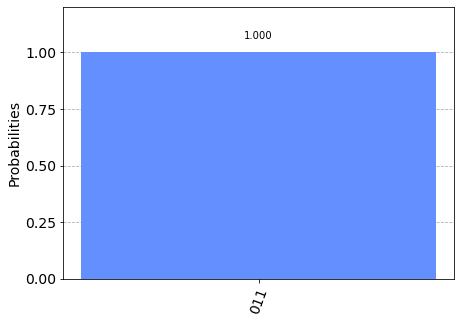

In [3]:
# Chose a general quantum simulator without noise.
# The simulator behaves as an ideal quantum computer.
backend = Aer.get_backend('qasm_simulator')

# set number of tries
nshots=8192

# execute the quantum circuit and store the outcome
job = backend.run(qc,shots=nshots)

# extract the result
result = job.result()

# count the outcome
counts = result.get_counts()

from qiskit.visualization import plot_histogram
plot_histogram(counts)

We obtain $|011\rangle = |3\rangle_3$  with unit probability.   The quantum algorithm has selected $j=3$ out of 8 integers. Hence, $\theta = 3 / 2^3 = 3/8$.  The result is in perfect agreement with the actual eigenvalue $e^{i \pi 3/4} = e^{2\pi i 3/8}$. 

What will happen if we use more qubits than necessary?  Let us try 4 qubits.  There are 16 integer numbers to chose.  If $j=6$ is selected, we should get the same answer.  The following code indeed finds 6 as the answer.

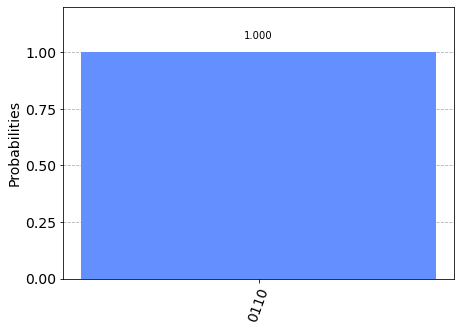

In [4]:
import numpy as np
from qiskit import *

cr=ClassicalRegister(4,'c')
qr=QuantumRegister(5,'q')
qc=QuantumCircuit(qr,cr)

# Walsh-Hadamard transformation for qubit 0-2
qc.h(range(4))

# X for qubit 3 to create |1>
qc.x(4)

qc.barrier()

for i in range(4):

# qubit 0
    for _ in range(2**i):
        qc.cp(np.pi*3/4,i,4)
        
qc.barrier()

# SWAP
qc.swap(0,3)
qc.swap(1,2)

# qubit 0
qc.h(0)

# qubit 1
qc.cp(-np.pi/2,1,0)
qc.h(1)

# qubit 2
qc.cp(-np.pi/4,2,0)
qc.cp(-np.pi/2,2,1)
qc.h(2)

# qubit 3
qc.cp(-np.pi/8,3,0)
qc.cp(-np.pi/4,3,1)
qc.cp(-np.pi/2,3,2)
qc.h(3)

qc.barrier()

qc.measure(0,0)
qc.measure(1,1)
qc.measure(2,2)
qc.measure(3,3)

# Chose a general quantum simulator without noise.
# The simulator behaves as an ideal quantum computer.
backend = Aer.get_backend('qasm_simulator')

# set number of tries
nshots=8192

# execute the quantum circuit and store the outcome
job = backend.run(qc,shots=nshots)

# extract the result
result = job.result()

# count the outcome
counts = result.get_counts()

from qiskit.visualization import plot_histogram
plot_histogram(counts)

Now we got $|0110\rangle = |6\rangle$ from which we find $\theta = 6/2^4 = 3/8$.  The result does not change.

## Irrational value

If the eigenvalue is $e^{2\pi i /3}$, $theta=1/3$ cannot be expressed by the finite binary fractions and thus it is not possible to get the perfect answer using the current algorithm.  Let us consider $U=P(2\pi/3)$ and $\psi\rangle=|1\rangle$.


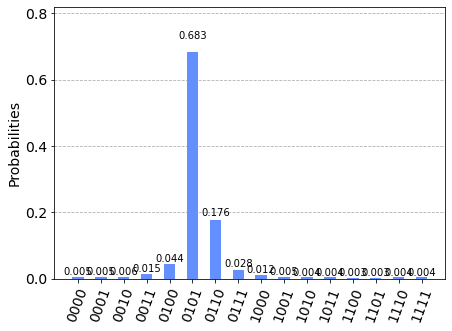

In [5]:
import numpy as np
from qiskit import *

cr=ClassicalRegister(4,'c')
qr=QuantumRegister(5,'q')
qc=QuantumCircuit(qr,cr)

# Walsh-Hadamard transformation for qubit 0-2
qc.h(range(4))

# X for qubit 3 to create |1>
qc.x(4)

qc.barrier()

for i in range(4):

# qubit 0
    for _ in range(2**i):
        qc.cp(np.pi*2/3,i,4)
        
qc.barrier()

# SWAP
qc.swap(0,3)
qc.swap(1,2)

# qubit 0
qc.h(0)

# qubit 1
qc.cp(-np.pi/2,1,0)
qc.h(1)

# qubit 2
qc.cp(-np.pi/4,2,0)
qc.cp(-np.pi/2,2,1)
qc.h(2)

# qubit 3
qc.cp(-np.pi/8,3,0)
qc.cp(-np.pi/4,3,1)
qc.cp(-np.pi/2,3,2)
qc.h(3)

qc.barrier()

qc.measure(0,0)
qc.measure(1,1)
qc.measure(2,2)
qc.measure(3,3)

# Chose a general quantum simulator without noise.
# The simulator behaves as an ideal quantum computer.
backend = Aer.get_backend('qasm_simulator')

# set number of tries
nshots=8192

# execute the quantum circuit and store the outcome
job = backend.run(qc,shots=nshots)

# extract the result
result = job.result()

# count the outcome
counts = result.get_counts()

from qiskit.visualization import plot_histogram
plot_histogram(counts)

Clearly $|0101\rangle = |5\rangle$ is dominant. It corresponds to $\theta = 5/2^4 = 0.3125$.  The exact answer is $1/3=0.3333...$.  The agreement is not bad and the error can be reduced by using more qubits.


---
Last modified on 07/24/2022.